### Data Dictionary for Titanic Dataset:
PassengerId		Unique ID assigned to each passenger
Survived	    Survival status (0 = No, 1 = Yes)
Pclass	        Ticket class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
Name	        Full name of the passenger
Sex	            Gender of the passenger (male or female)
Age	            Age of the passenger in years (may contain NaN values)
SibSp	        Number of siblings/spouses aboard the Titanic
Parch	     	Number of parents/children aboard the Titanic
Ticket	        Ticket number
Fare	        Passenger fare (cost of the ticket)
Cabin	        Cabin number (may contain NaN values)
Embarked	    Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [4]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('titanic_data.csv')

In [6]:
#Read first 10 rows of the data
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
#Find the shape of the dataset
data.shape

(891, 12)

In [8]:
#Find the missing values in the dataset
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#Find the proportion of missing values in the dataset
for i in data.columns:
    missing_val_percent = data[i].isnull().sum()/data.shape[0]
    print(f"Missing values in the column {i}: {missing_val_percent}")

Missing values in the column PassengerId: 0.0
Missing values in the column Survived: 0.0
Missing values in the column Pclass: 0.0
Missing values in the column Name: 0.0
Missing values in the column Sex: 0.0
Missing values in the column Age: 0.19865319865319866
Missing values in the column SibSp: 0.0
Missing values in the column Parch: 0.0
Missing values in the column Ticket: 0.0
Missing values in the column Fare: 0.0
Missing values in the column Cabin: 0.7710437710437711
Missing values in the column Embarked: 0.002244668911335578


In [10]:
#Provide information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
#Find duplicate rows in the dataset
data.duplicated().sum()

np.int64(0)

In [12]:
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [13]:
#Find if the age is negative is greater than 100
age_inconsistent = ((data['Age'] <= 0.0) | (data['Age'] >= 100.0)).sum()
age_inconsistent

np.int64(0)

Text(0.5, 1.0, 'Boxplot for Age')

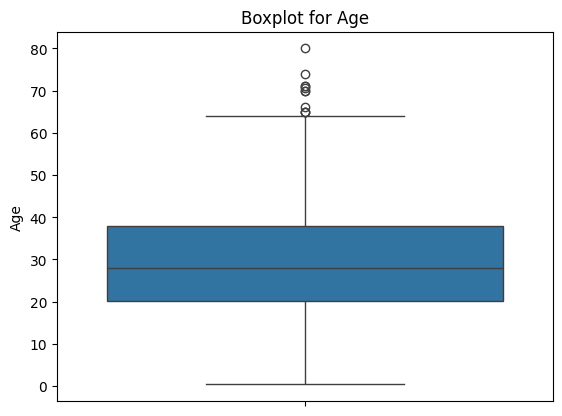

In [14]:
#Find outliers in the age column using box plot
sb.boxplot(data['Age'])
plt.title('Boxplot for Age')

In [15]:
#Since there are outliers in the age column, suggested to use median imputation
data['Age'] = data['Age'].fillna(data['Age'].median())

In [16]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [18]:
#Find the unique values in Embarked column
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
#Use mode imputation to fill the missing values in Embarked column
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [20]:
#Drop the cabin column since it has number of missing values
data.drop('Cabin', axis=1, inplace=True)

In [21]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Categorical Encoding

In [22]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Perform label encoding 
# on Sex column
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

In [24]:
#Perform one-hot encoding on Embarked column
embarked_enc = pd.get_dummies(data['Embarked']).astype(int)
embarked_enc

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [25]:
embarked_enc_drop = pd.get_dummies(data['Embarked'], drop_first=True)
embarked_enc_drop

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [26]:
data_encoded = pd.concat([data, embarked_enc], axis=1)
data_encoded.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,0,0,1
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,Q,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,S,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,S,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,S,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,C,1,0,0


In [27]:
data_encoded.drop('Embarked', axis=1, inplace=True)
data_encoded.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,1,0,0


In [ ]:
#Ticket number is not going to contribute to any predictions like how many people survived, age group survived. So, drop the column
data_encoded.drop('Ticket', axis=1, inplace=True)

In [29]:
data_encoded.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0,0,1
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,8.4583,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,51.8625,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,21.0750,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,11.1333,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,30.0708,1,0,0


In [30]:
#Use descriptive statistics to find the min and max values
data_encoded.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,0.188552,0.086420,0.725028
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.391372,0.281141,0.446751
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


## Feature Scaling

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Identify the target and independent variables
X = data_encoded.drop('Survived', axis=1)
Y = data_encoded['Survived']

#Split the data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(f"Size of training data: {X_train.shape[0]}")
print(f"Size of test data: {X_test.shape[0]}")


Size of training data: 712
Size of test data: 179


### Perform Standard Scaling

In [32]:
std_scaler = StandardScaler()
X_train['Age'] = std_scaler.fit_transform(X_train[['Age']])
X_test['Age'] = std_scaler.transform(X_test[['Age']])

In [33]:
X_train.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,C,Q,S
331,332,1,"Partner, Mr. Austen",1,1.253641,0,0,28.5000,0,0,1
733,734,2,"Berriman, Mr. William John",1,-0.477284,0,0,13.0000,0,0,1
382,383,3,"Tikkanen, Mr. Juho",1,0.215086,0,0,7.9250,0,0,1
704,705,3,"Hansen, Mr. Henrik Juul",1,-0.246494,1,0,7.8542,0,0,1
813,814,3,"Andersson, Miss. Ebba Iris Alfrida",0,-1.785093,4,2,31.2750,0,0,1
118,119,1,"Baxter, Mr. Quigg Edmond",1,-0.400354,0,1,247.5208,1,0,0
536,537,1,"Butt, Major. Archibald Willingham",1,1.215176,0,0,26.5500,0,0,1
361,362,2,"del Carlo, Mr. Sebastiano",1,-0.015704,1,0,27.7208,1,0,0
29,30,3,"Todoroff, Mr. Lalio",1,-0.092634,0,0,7.8958,0,0,1
55,56,1,"Woolner, Mr. Hugh",1,-0.092634,0,0,35.5000,0,0,1


Text(0.5, 1.0, 'Box Plot for Fare')

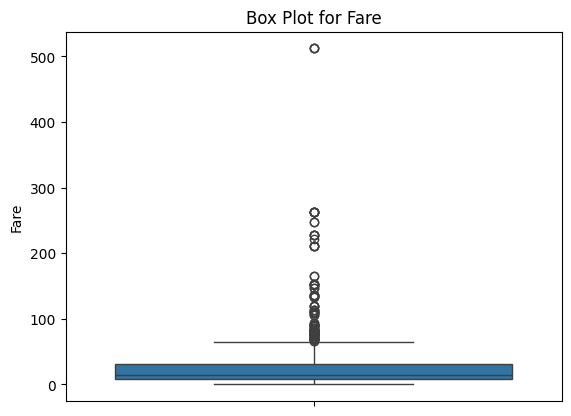

In [34]:
#Find if Fare has any outliers
sb.boxplot(data_encoded['Fare'])
plt.title('Box Plot for Fare')

In [35]:
### Perform Robust Scaling to handle outliers 
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()
X_train['Fare'] = rob_scaler.fit_transform(X_train[['Fare']])
X_test['Fare'] = rob_scaler.transform(X_test[['Fare']])

In [36]:
X_train.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,C,Q,S
331,332,1,"Partner, Mr. Austen",1,1.253641,0,0,0.622184,0,0,1
733,734,2,"Berriman, Mr. William John",1,-0.477284,0,0,-0.064416,0,0,1
382,383,3,"Tikkanen, Mr. Juho",1,0.215086,0,0,-0.289223,0,0,1
704,705,3,"Hansen, Mr. Henrik Juul",1,-0.246494,1,0,-0.292359,0,0,1
813,814,3,"Andersson, Miss. Ebba Iris Alfrida",0,-1.785093,4,2,0.745107,0,0,1
118,119,1,"Baxter, Mr. Quigg Edmond",1,-0.400354,0,1,10.324102,1,0,0
536,537,1,"Butt, Major. Archibald Willingham",1,1.215176,0,0,0.535805,0,0,1
361,362,2,"del Carlo, Mr. Sebastiano",1,-0.015704,1,0,0.587668,1,0,0
29,30,3,"Todoroff, Mr. Lalio",1,-0.092634,0,0,-0.290516,0,0,1
55,56,1,"Woolner, Mr. Hugh",1,-0.092634,0,0,0.932261,0,0,1
